In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_train = pd.read_csv("/content/drive/MyDrive/RoboISM basic tasks/ML task Linear Regression/train_data.csv")
df_test = pd.read_csv("/content/drive/MyDrive/RoboISM basic tasks/ML task Linear Regression/test_data.csv")

print(df_train.shape)
print(df_test.shape)

X_train = df_train.iloc[:,0].values
y_train = df_train.iloc[:,1].values

X_test = df_test.iloc[:,0].values
y_test = df_test.iloc[:,1].values



(699, 2)
(300, 2)


In [86]:
class Linear_Regression():
    def __init__(self):
        self.W = None
        self.b = None
        self.feat_mean = None
        self.feat_std = None

    def train(self, X_train, y_train, learning_rate = 1e-5, num_iters = 1000, verbose = False, show_at = 100):

        self.feat_mean = np.mean(X_train, axis = 0)
        self.feat_std = np.std(X_train, axis = 0)

        X = ( X_train - self.feat_mean )/self.feat_std

        num_train = X.shape[0]
        self.W = np.random.randn(1,1)
        self.b = np.random.randn(1)

        y = X * self.W + self.b

        for i in range(num_iters):

            dW = 1/num_train * (X @ (y - y_train).T)
            db = 1/num_train * (np.sum(y - y_train))
            self.W -= learning_rate* dW
            self.b -= learning_rate* db

            y = X * self.W + self.b
            J = 1/num_train * np.sum((y - y_train)**2)    # MSE

            if(verbose == True):
                if((i) % show_at == 0):
                    print("Iteration -> {} RMSE -> {}".format(i, (J)**(0.5)))
                    plt.scatter(X_train, y_train, marker = '*', c = 'c', label = 'Training value')
                    plt.scatter(X_train, y, marker = '*', c = 'r', label = 'Prediction')
                    plt.legend()
                    plt.show()
        print("Iteration -> {}, RMSE -> {}".format(i+1, (J)**(0.5)))
        plt.scatter(X_train, y_train, marker = '*', c = 'c', label = 'Training value')
        plt.scatter(X_train, y, marker = '*', c = 'r', label = 'Prediction')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        X_t = ( X_test - self.feat_mean )/self.feat_std
        y_test = X_t * self.W + self.b

        return y_test


Iteration -> 5000, RMSE -> 2.8049514672250013


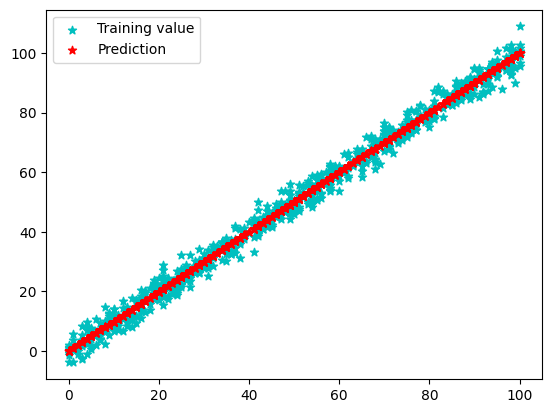

In [87]:
lr = Linear_Regression()

lr.train(X_train, y_train, learning_rate = 1e-2, num_iters = 5000, verbose = False, show_at = 500)

In [88]:
y_pred = lr.predict(X_test)
y_pred.shape

(1, 300)

Root Mean Square Error :  3.07130626802989


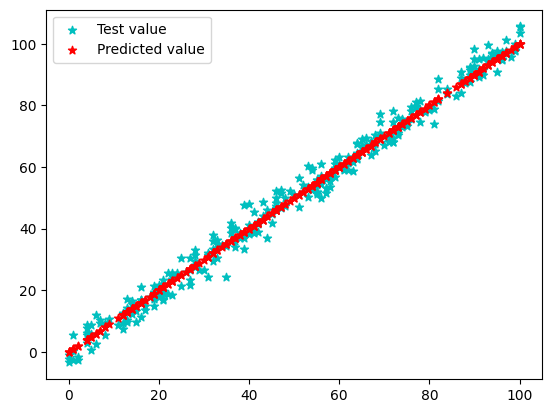

In [89]:
RMSE = (1 / y_test.shape[0] * np.sum((y_pred - y_test)**2))**0.5
print("Root Mean Square Error : ", RMSE)

plt.scatter(X_test, y_test, marker = '*', c = 'c', label = 'Test value')
plt.scatter(X_test, y_pred, marker = '*', c = 'r', label = 'Predicted value')
plt.legend()
plt.show()